***
# __Feature Selection for Linear Regression__


***
## Feature Selection: Unveiling the Power Players in Your Data

Imagine an orchestra where every instrument contributes to the symphony, but a few take the lead melody. Similar to crafting a captivating composition, selecting the right features in your data empowers your models to perform magic.

So, why is feature selection such a crucial act? Three compelling reasons stand out:

* **Taming the Overfitting Beast:** Think of irrelevant features as noisy chatter drowned out the lead violin. By removing them, we reduce the risk of our models overfitting to those distractions, leading to better generalization and real-world performance.

* **Accuracy: A Sharper Melody:** Just like eliminating off-key notes improves the harmony, choosing relevant features clarifies the signal your model learns from. This translates to boosted accuracy and reliable predictions.

* **Training Time Tango:** Less data means a quicker training dance for your models. Think of it as streamlining the orchestra, allowing them to focus on the essential instruments and deliver their masterpiece faster.

But how do we pick these star performers? Enter the three main acts of feature selection:

**1. The Filter Method: A Selective Screening:** Just like an audition, here, we evaluate each feature individually, assessing their correlation with the target variable or other measures of relevance. Only the strongest contenders make it through to the ensemble.

**2. The Wrapper Method: A Trial-and-Error Dance:** This approach takes inspiration from a conductor fine-tuning the composition. It wraps a Machine Learning algorithm at its core, iteratively adding and removing features based on their impact on the model's performance. Think of it as a series of dress rehearsals until the perfect combination emerges.

**- RFE (Recursive Feature Elimination):** A systematic elimination process, where features are ranked and iteratively removed based on their contribution, revealing the most valuable players on stage.

**3. The Embedded Method: A Collaborative Symphony:** These methods weave feature selection seamlessly into the model training process itself. Think of it as the conductor subtly guiding the instruments during the performance, extracting the most impactful contributions along the way.

**- Lasso and Ridge Regression (L1 and L2 Regularization):** These techniques penalize complex models with many features, effectively forcing them to rely on a smaller, more relevant set for predictions. Imagine the conductor encouraging simplicity for a tighter, more captivating performance.

By understanding these different styles of feature selection, you can unlock the true potential of your data and empower your models to deliver captivating insights and accurate predictions. Remember, a well-chosen ensemble makes all the difference!
***



## Dive into Data with Lux: Your Python Visionary

Data exploration: sometimes exhilarating treasure hunt, sometimes overwhelming labyrinth. Fear not, adventurer! **Lux, the Python API for Intelligent Visual Discovery, is your trusty AI torch, illuminating hidden patterns and relationships in your data's depths.**

**Say goodbye to aimless wandering and hello to focused exploration.** Lux automates aspects of the data analysis process, letting you experiment faster and uncover insights even when lost in the unknown. No more sifting through endless lines of code; Lux presents its findings through beautifully crafted **interactive visualizations directly within your Jupyter notebook.**

Think of it as a visual storytelling assistant, weaving narratives within your data. With each click and scroll, you zoom in on hidden connections, uncovering trends and outliers that traditional analysis might miss. Lux empowers you to:

* **Play with possibilities:** Quickly try different visualizations and parameters, seeing how your data dances under different spotlights.
* **Spot the unexpected:** Forget pre-defined hypotheses; Lux reveals surprising patterns and anomalies, sparking new questions and avenues for exploration.
* **Collaborate seamlessly:** Share your discoveries with colleagues and stakeholders through interactive, easily understandable visualizations.

**No data science wizardry required.** Lux empowers anyone, from seasoned analysts to curious beginners, to become data storytelling virtuosos. So, grab your Python wand, invoke Lux, and let your data lead the way. Get ready to witness the magic of your insights unfold before your eyes!

**Bonus Tip:** Check out the Lux documentation and tutorials for a deeper dive into its features and capabilities. Remember, the more you explore, the more your data has to reveal!


https://github.com/lux-org/lux

***
`!pip install lux-api --user`<br>
`!jupyter nbextension install --py luxwidget`<br>
`pip install jupyter_contrib_nbextensions` <br>
***

***
## __Recap__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

from sklearn.preprocessing import PowerTransformer
from feature_engine.outliers import Winsorizer

C:\Users\kimat\AppData\Local\Temp\ipykernel_5532\3307922121.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = fetch_california_housing()

california_housing = pd.DataFrame(data.data, columns=data.feature_names)

california_housing['Price'] = data.target

features = list(data.feature_names)
print('features:\n', features)

california_housing.sample(5)

features:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
13104,5.8239,17.0,6.887324,1.025039,1970.0,3.082942,38.41,-121.32,2.475
3960,2.6159,19.0,3.292092,1.093112,2004.0,2.556122,34.21,-118.60,1.823
4826,0.8351,29.0,3.237716,1.151394,2114.0,2.807437,34.03,-118.31,1.500
1619,6.6657,26.0,7.249201,1.012780,918.0,2.932907,37.82,-122.12,3.645
1281,2.2361,47.0,4.941476,1.094148,1074.0,2.732824,38.01,-121.81,1.051


In [3]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
imp_features = [ 'MedInc','HouseAge','AveRooms','AveBedrms','Population', 'AveOccup','Latitude' ] 

In [5]:
california_housing


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
corrmat = california_housing.corr()
corrmat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [7]:
corrmat['Price']

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Price         1.000000
Name: Price, dtype: float64

<Axes: >

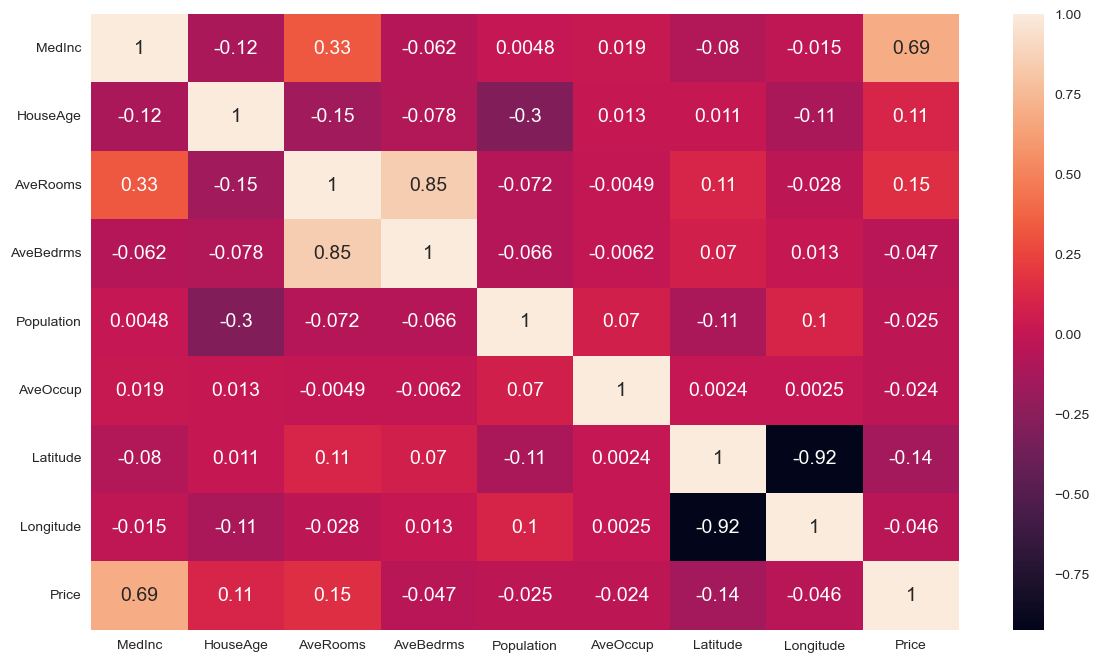

In [8]:
fig,ax = plt.subplots(figsize=(14,8))
sns.heatmap(corrmat, annot=True, annot_kws={'size':14})

In [9]:
corrmat.index

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [10]:
def getCorrelatedFeature(corrdata, th):
    selected_features = []
    value = []
    
    for i, col in enumerate(corrdata.index):
        if abs(corrdata[col])>th:
            selected_features.append(col)
            value.append(corrdata[col])
            
    df = pd.DataFrame(data=value, index=selected_features, columns = ['Corr Value'])
    
    return df

In [11]:
getCorrelatedFeature(corrmat['Price'], 0.5)

,Corr Value
MedInc,0.688075
Price,1.000000


In [12]:
corr_value = corrmat[abs(corrmat['Price'])>0.5][['Price']]
corr_value

,Price
MedInc,0.688075
Price,1.000000


In [13]:
corr_value.index

Index(['MedInc', 'Price'], dtype='object')

In [14]:
correlated_data = california_housing[corr_value.index]
correlated_data.head()

,MedInc,Price
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


<Axes: >

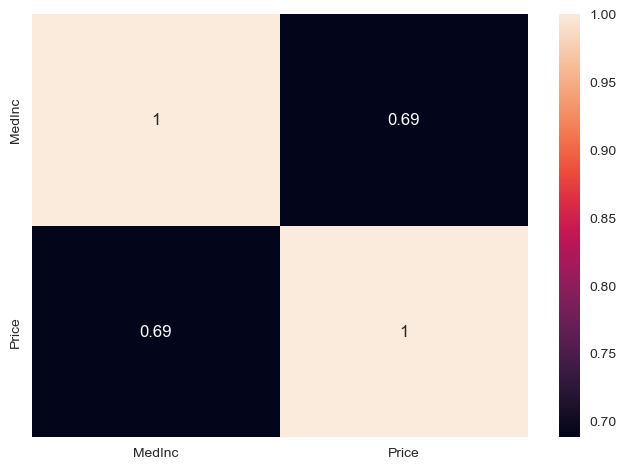

In [15]:
sns.heatmap(correlated_data.corr(), annot=True)


***
## __Model Performance Evaluation__

In [16]:
list(correlated_data.columns)

['MedInc', 'Price']

In [17]:
selected_features = [ 'MedInc', 'Price']

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Outliers Removal Selected
Transformations Selected


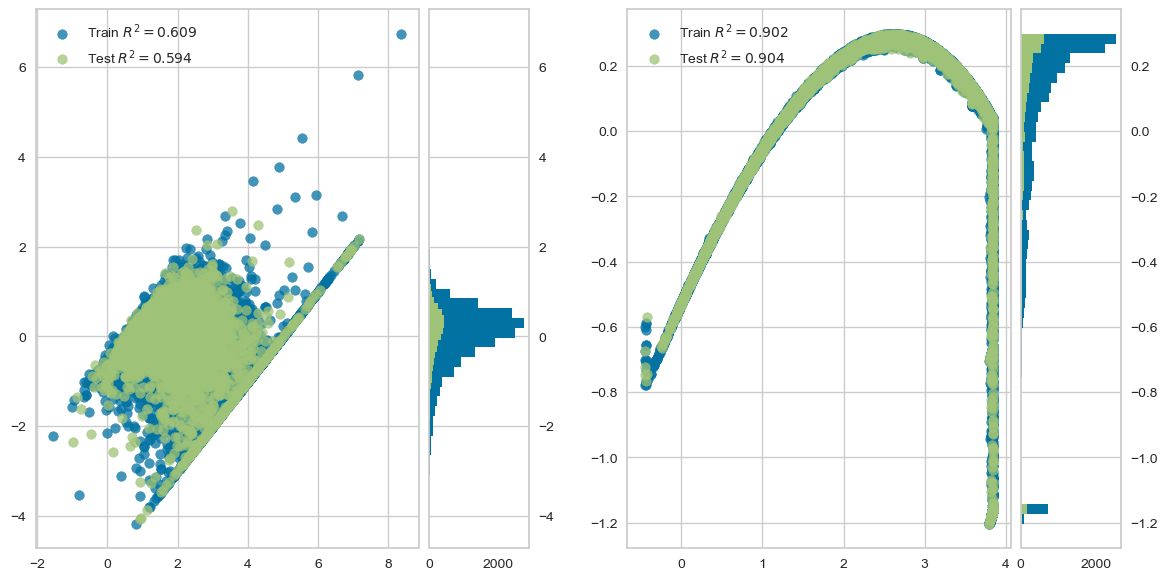

In [20]:
def run_Outliers_Transformations_Linear_Regression(df, cols, outliers=True, transformations=True):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers and Yeo-Johnson Transformation
    X_train, X_test, y_train, y_test = train_test_split(df, california_housing['Price'],
                test_size=0.2,
                random_state=0)
    
    #outliers removal
    if outliers == True:
        print('Outliers Removal Selected')
        winsorizer = Winsorizer(#distribution='skewed',
                           tail='both',
                           fold=1.5,
                           variables=cols)

        X_train = winsorizer.fit_transform(X_train)
        X_test = winsorizer.transform(X_test)
    
    #transformations
    if transformations==True:
        print('Transformations Selected')
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        X_train = transformer.fit_transform(X_train)
        X_test = transformer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Outliers_Transformations_Linear_Regression(california_housing[selected_features], selected_features)

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


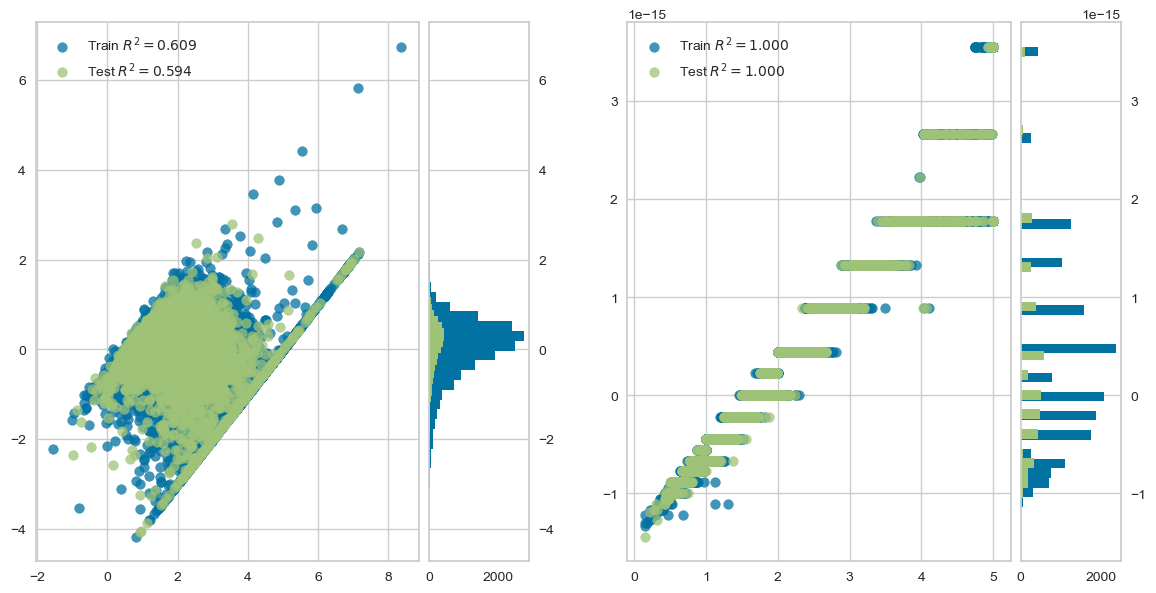

In [28]:
run_Outliers_Transformations_Linear_Regression(california_housing[selected_features],
                                               selected_features,
                                              outliers=False,
                                              transformations=False)

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Outliers Removal Selected


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


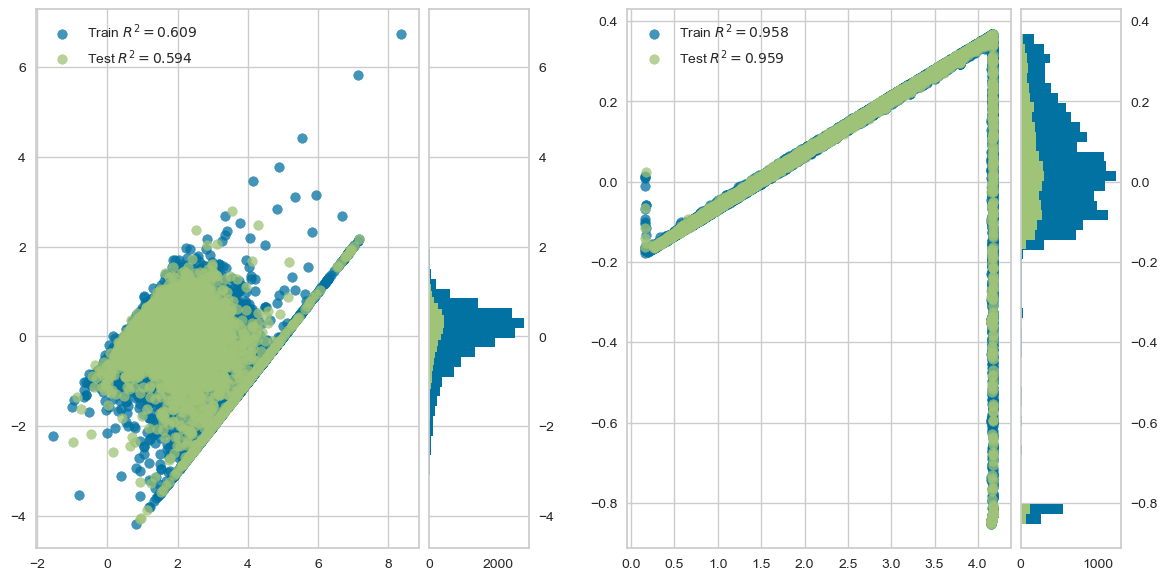

In [29]:
run_Outliers_Transformations_Linear_Regression(california_housing[selected_features],
                                               selected_features,
                                              outliers=True,
                                              transformations=False)

***
## __Remove Correlated Input Features (Multicollinearity)__ 

<Axes: >

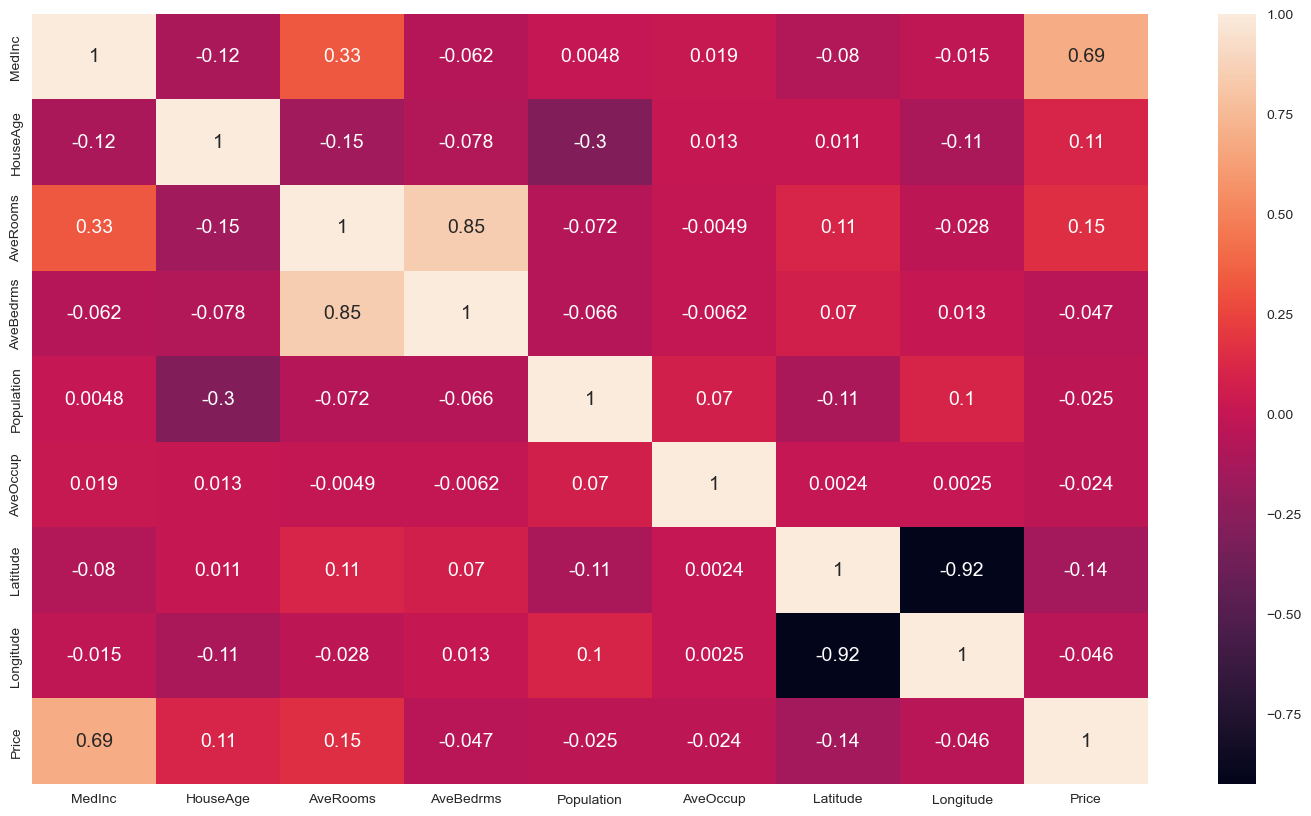

In [30]:
fig,ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size':14})

In [31]:
def correlation(data, th):
    col_corr = set()
    
    corr_matrix = data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>th:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [32]:
corr_features = correlation(california_housing, 0.8)
corr_features

{'AveBedrms', 'Longitude'}

In [33]:
selected_features = list(set(features)-corr_features)
print(selected_features)

['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Population', 'AveOccup']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Outliers Removal Selected
Transformations Selected


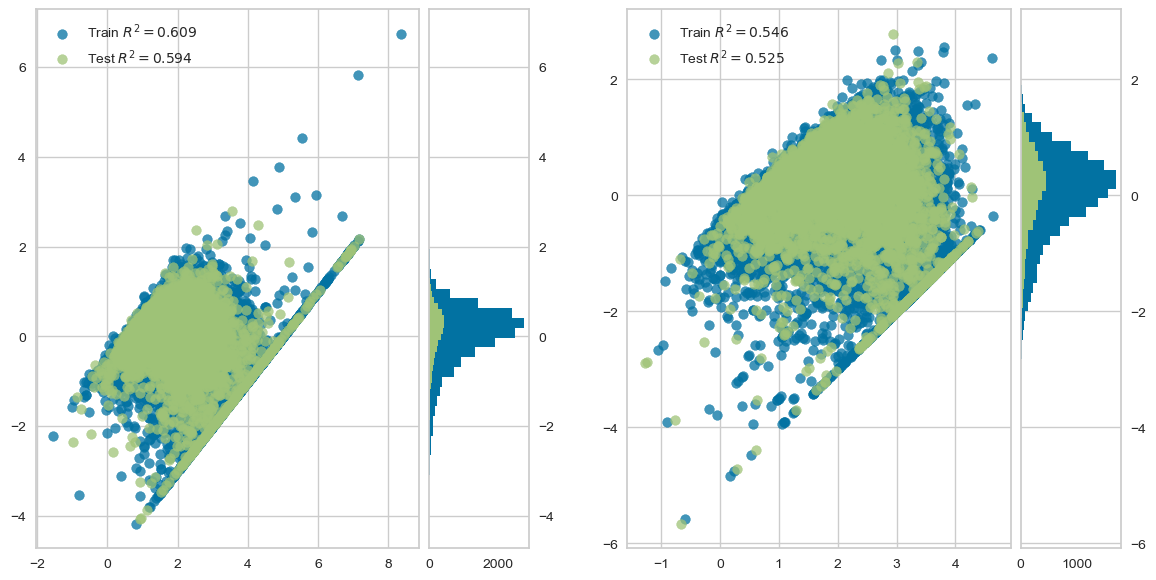

In [34]:
run_Outliers_Transformations_Linear_Regression(california_housing[selected_features],
                                               selected_features,
                                              outliers=True,
                                              transformations=True)

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Outliers Removal Selected
Transformations Selected


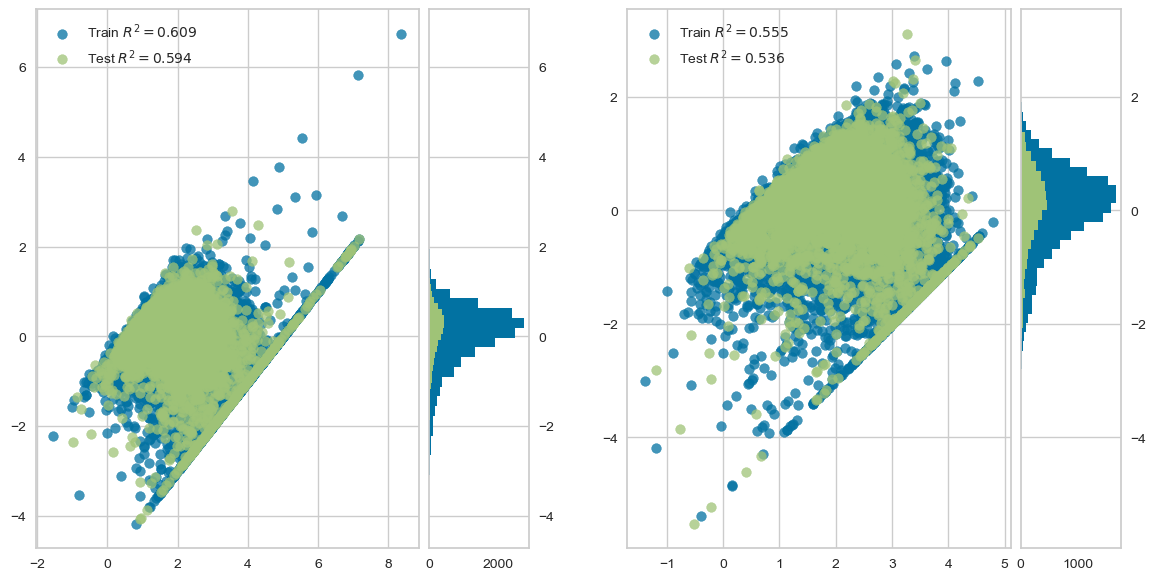

In [35]:
run_Outliers_Transformations_Linear_Regression(california_housing[features],
                                               features,
                                              outliers=True,
                                              transformations=True)

***
## __Recursive Feature Elimination (RFE)__

In [36]:
from sklearn.feature_selection import RFE

In [38]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                california_housing['Price'],
                test_size=0.2,
                random_state=0)

In [39]:
model = LinearRegression()

selector = RFE(model, n_features_to_select=5, step=1)
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [40]:
selector.support_

array([ True, False,  True,  True, False, False,  True,  True])

In [41]:
X_train.columns[selector.support_]

Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')

In [42]:
selector.n_features_

5

In [43]:
selector.ranking_

array([1, 2, 1, 1, 4, 3, 1, 1])

In [44]:
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [45]:
pd.Series(selector.ranking_, features)

MedInc        1
HouseAge      2
AveRooms      1
AveBedrms     1
Population    4
AveOccup      3
Latitude      1
Longitude     1
dtype: int32

In [46]:
selected_features = list(X_train.columns[selector.support_])
selected_features

['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Outliers Removal Selected
Transformations Selected


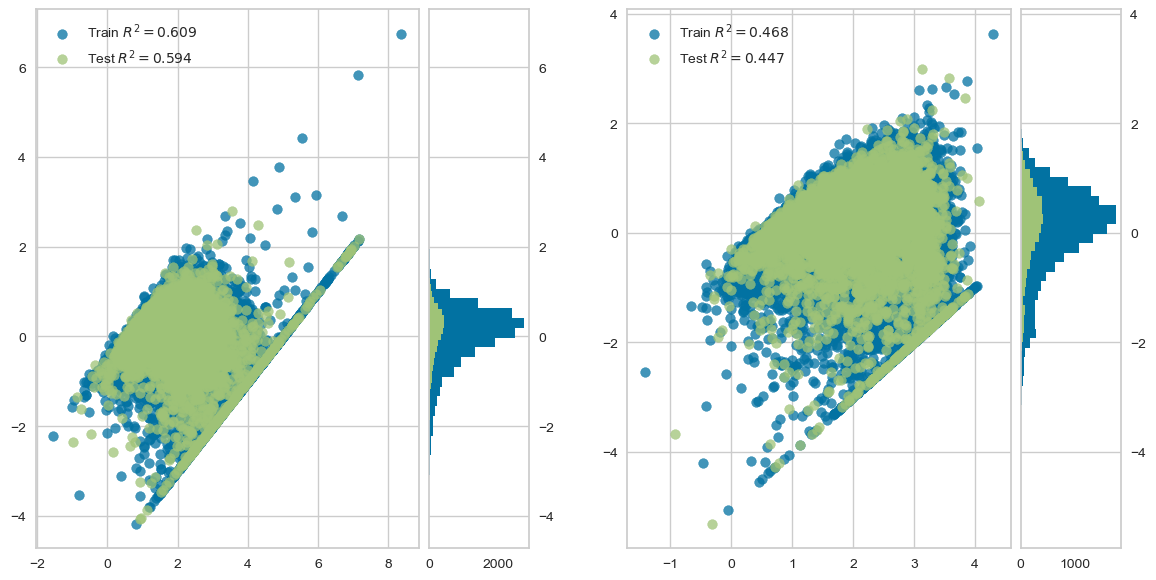

In [47]:
run_Outliers_Transformations_Linear_Regression(california_housing[selected_features], selected_features)

***
## __Increamental RFE__ 

In [48]:
def increamental_RFE(n_features_to_select):
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                    california_housing['Price'],
                    test_size=0.2,
                    random_state=0)

    model = LinearRegression()

    selector = RFE(model, n_features_to_select=n_features_to_select, step=1)
    selector.fit(X_train, y_train)

    selected_features = list(X_train.columns[selector.support_])
    print('Selected Features for Training: ', selected_features)
    
    run_Outliers_Transformations_Linear_Regression(california_housing[selected_features], selected_features,
                                              outliers=False, transformations=True)

Selected Features for Training:  ['Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


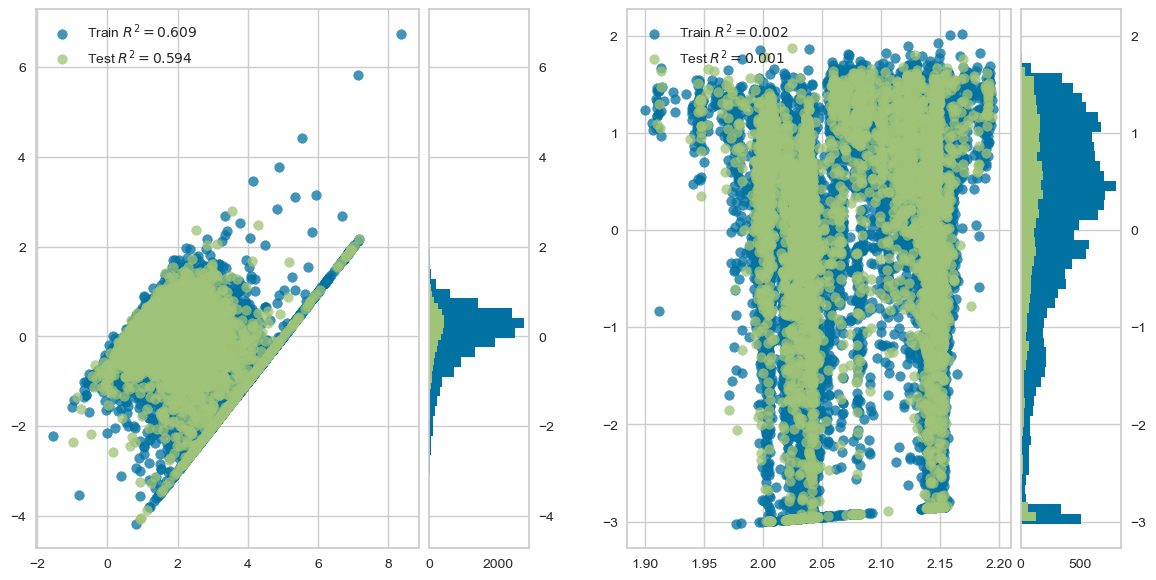




Selected Features for Training:  ['Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


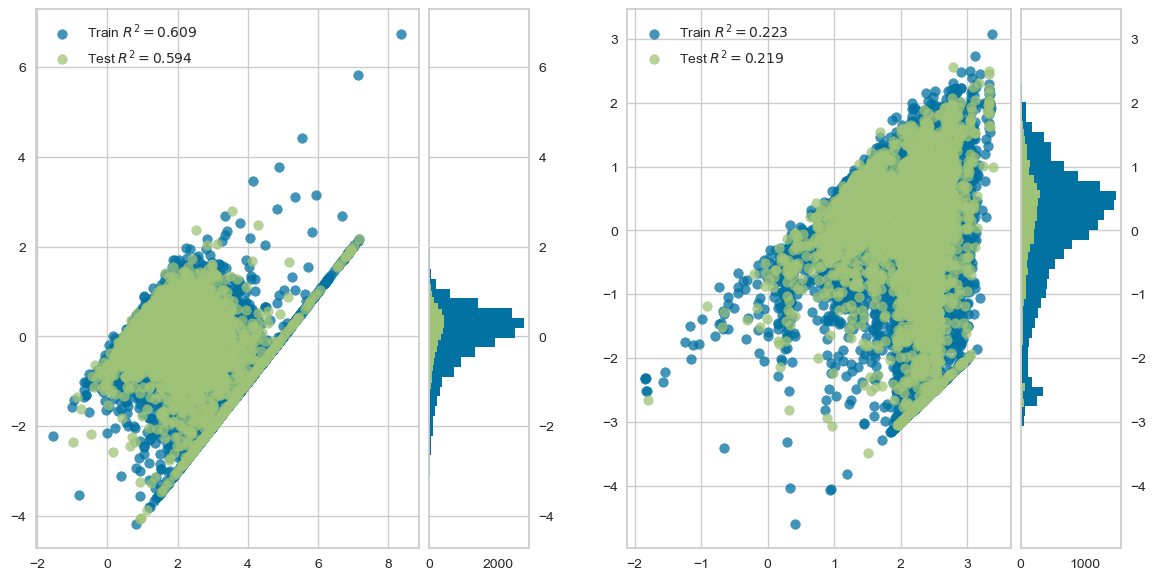




Selected Features for Training:  ['MedInc', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


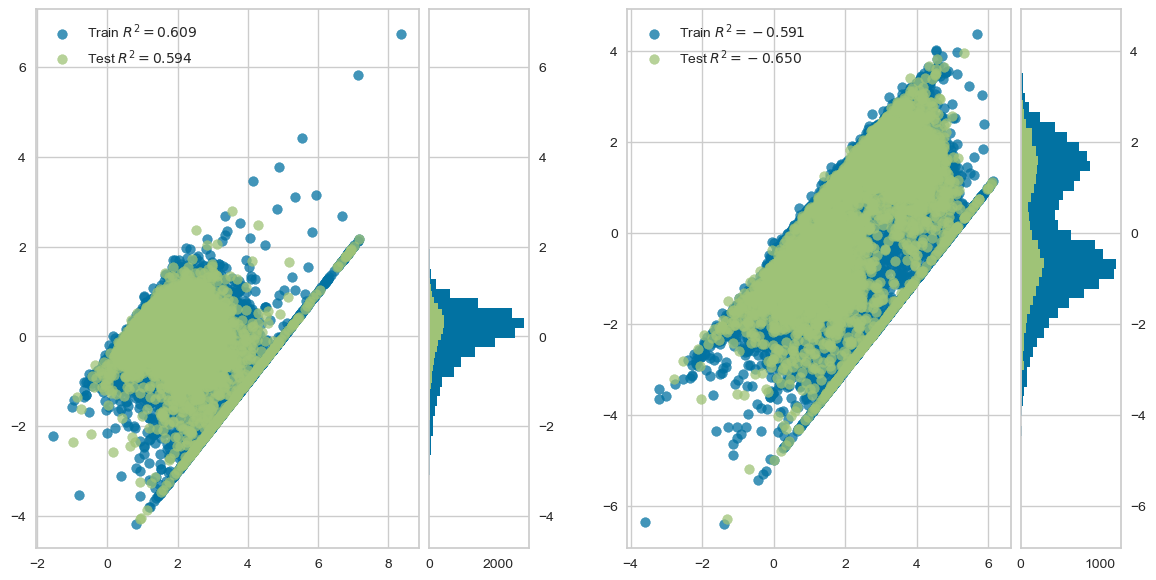




Selected Features for Training:  ['MedInc', 'AveBedrms', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


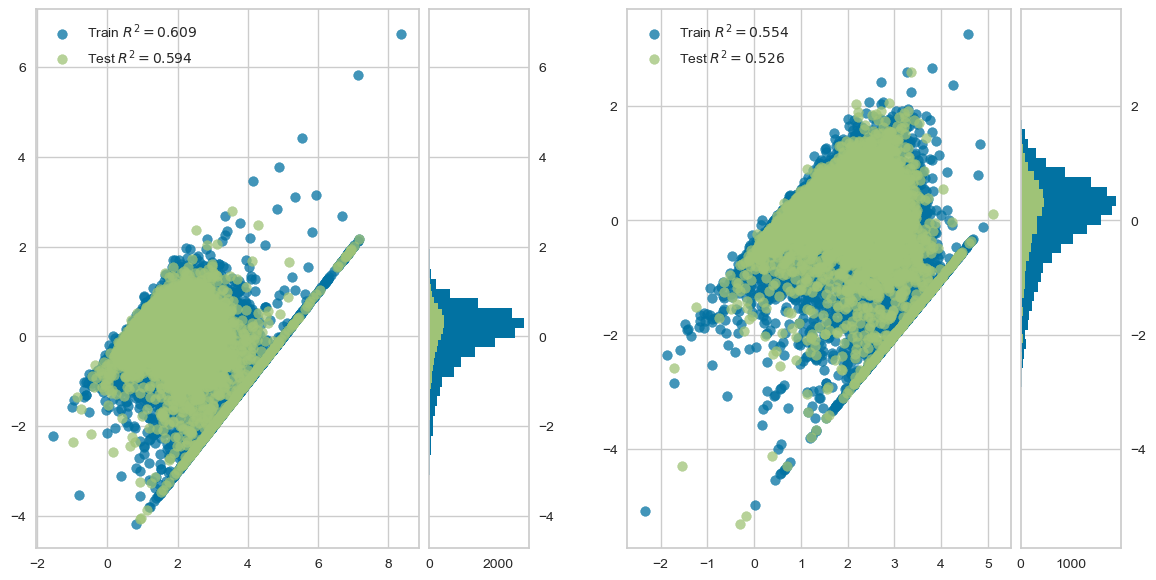




Selected Features for Training:  ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


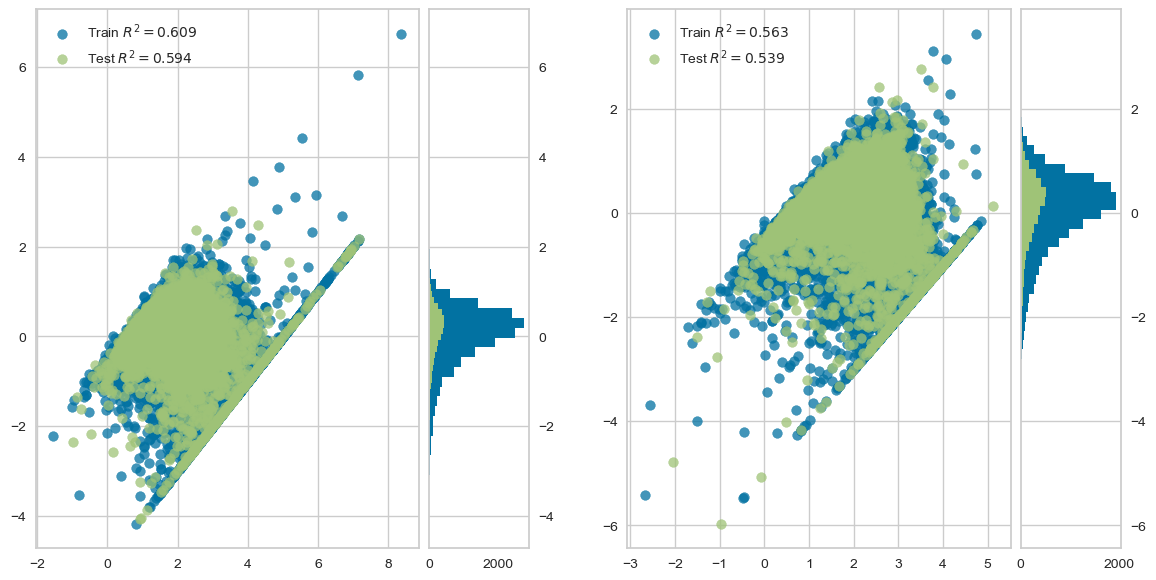




Selected Features for Training:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


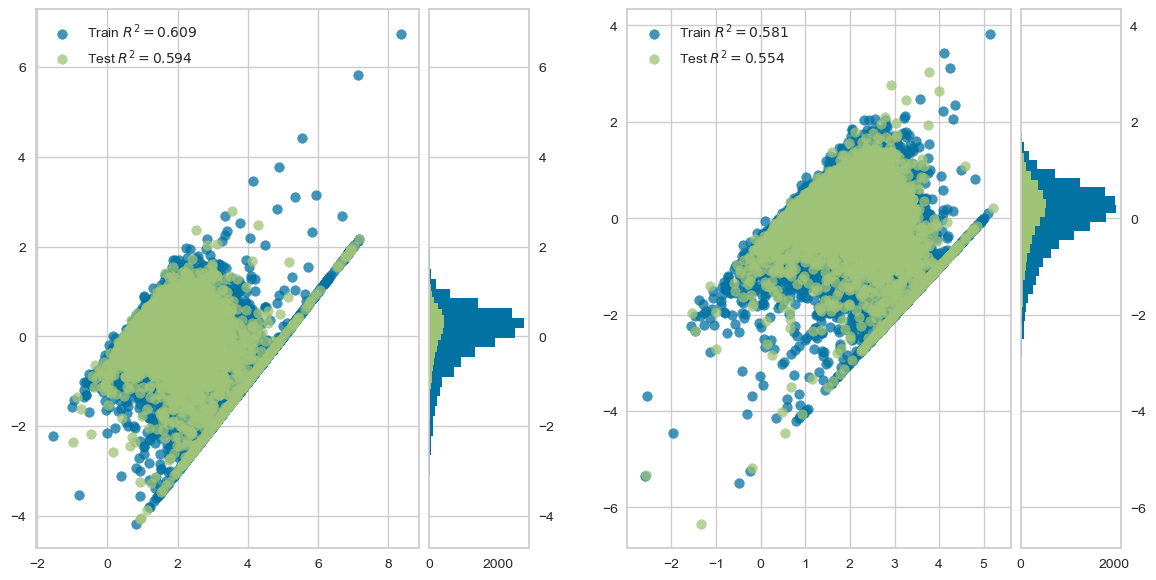




Selected Features for Training:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


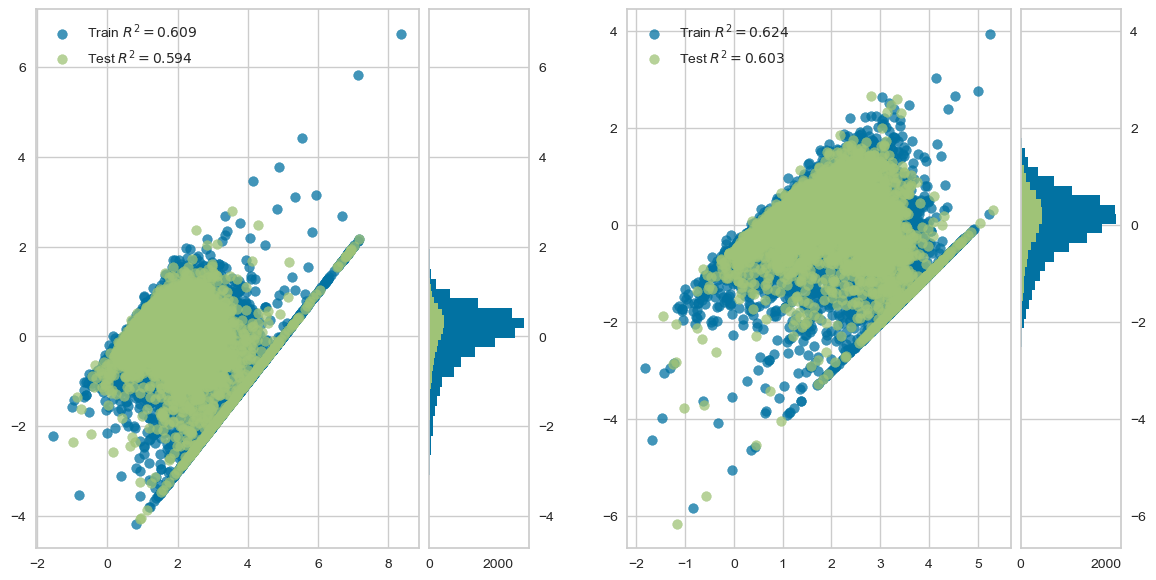




Selected Features for Training:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


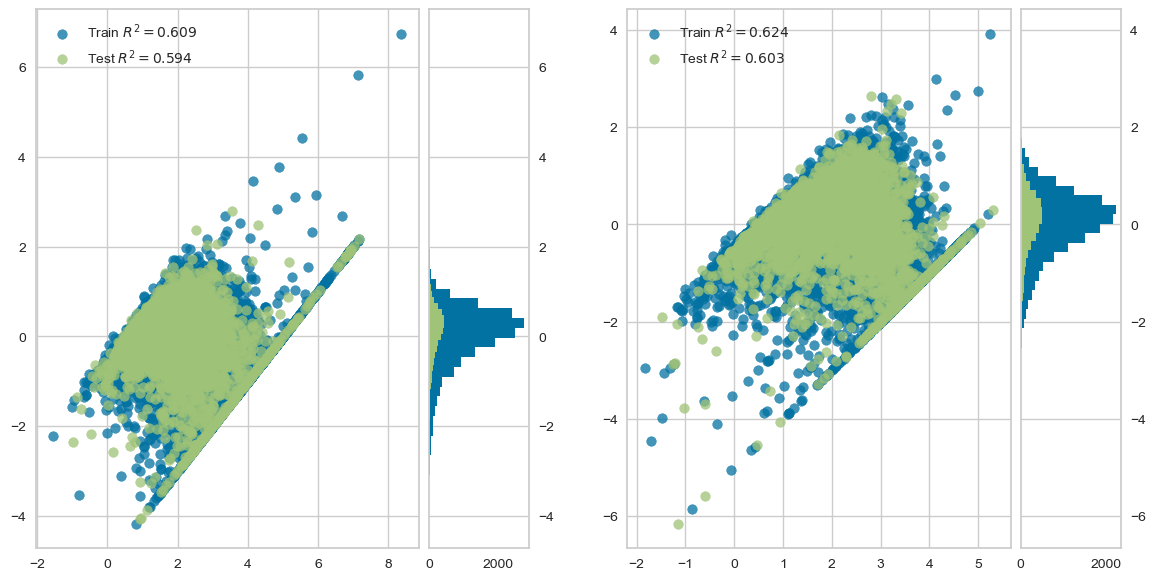

In [49]:
for i in range(1, len(features)+1):
    increamental_RFE(i)
    
    plt.show()
    print('\n\n')

***
## __Exhaustive Feature Selection (EFS)__

In [51]:
# !pip install mlxtend

In [52]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [56]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                    california_housing['Price'],
                    test_size=0.2,
                    random_state=0)

model = LinearRegression()

selector = EFS(model,
              min_features=3,
              max_features=8,
              scoring='r2',
              print_progress=False,
              cv=2)

selector.fit(X_train, y_train)

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\s

ExhaustiveFeatureSelector(cv=2, estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7]],
                          max_features=8, min_features=3, print_progress=False,
                          scoring='r2')

In [57]:
selector.best_idx_

(0, 1, 2, 3, 5, 6, 7)

In [58]:
selector.best_feature_names_

('MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'AveOccup',
 'Latitude',
 'Longitude')

Selected Features for Training:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


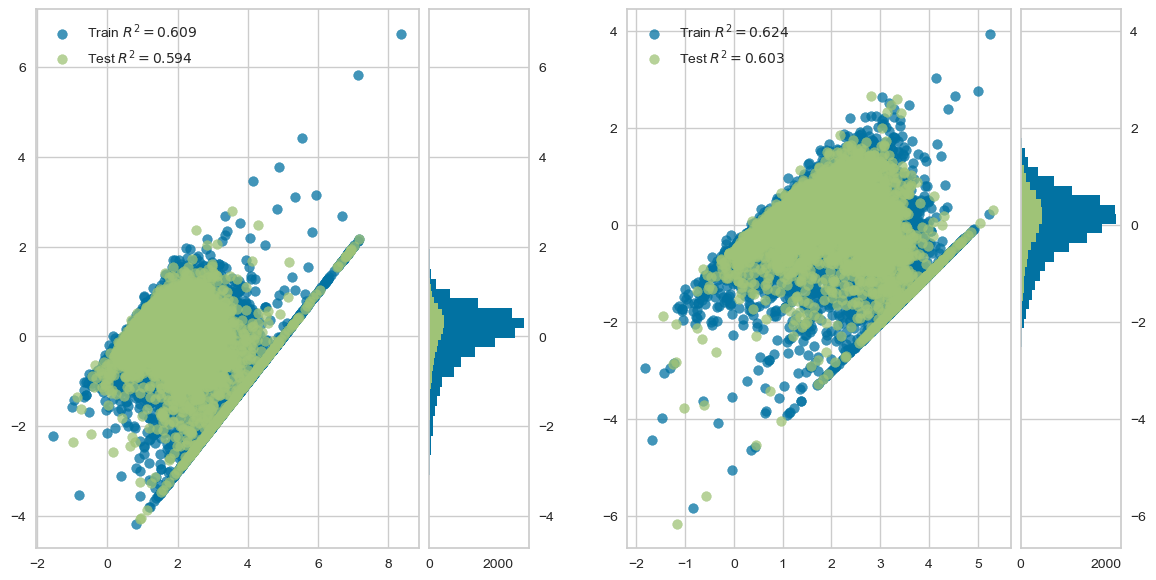

In [60]:
selected_features = list(selector.best_feature_names_)
print('Selected Features for Training: ', selected_features)

run_Outliers_Transformations_Linear_Regression(california_housing[selected_features], selected_features,
                                              outliers=False, transformations=True)

***
## __Feature Selection by Linear Regression Coefficients__

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [62]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                    california_housing['Price'],
                    test_size=0.2,
                    random_state=0)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
selector = SelectFromModel(LinearRegression())

selector.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression())

In [65]:
selector.get_support()

array([ True, False, False, False, False, False,  True,  True])

In [66]:
selected_features = california_housing[features].columns[selector.get_support()]
selected_features

Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')

In [71]:
coeff = selector.estimator_.coef_
coeff

array([ 0.82624793,  0.1171006 , -0.24891059,  0.29038746, -0.00864349,
       -0.03056429, -0.90042112, -0.87058566])

In [69]:
s = pd.Series(selector.estimator_.coef_, features)
s

MedInc        0.826248
HouseAge      0.117101
AveRooms     -0.248911
AveBedrms     0.290387
Population   -0.008643
AveOccup     -0.030564
Latitude     -0.900421
Longitude    -0.870586
dtype: float64

<BarContainer object of 8 artists>

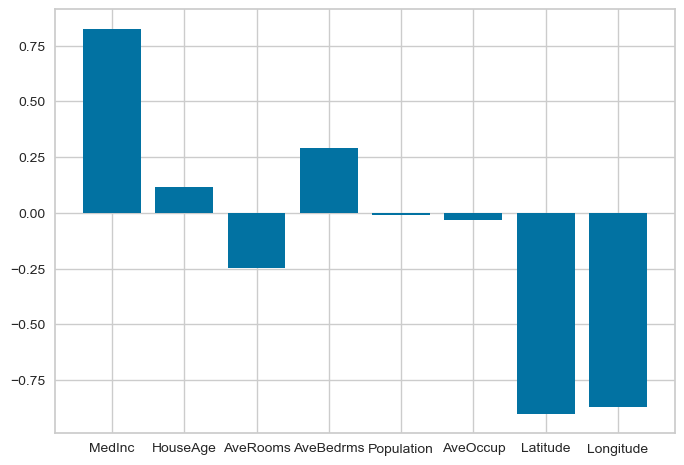

In [72]:
plt.bar(features, coeff)

In [73]:
print(selected_features)

Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')


In [74]:
abs(s).mean()

0.41160764215427226

In [75]:
s[abs(s)>1.58]

Series([], dtype: float64)

In [76]:
selected_features

Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Outliers Removal Selected
Transformations Selected


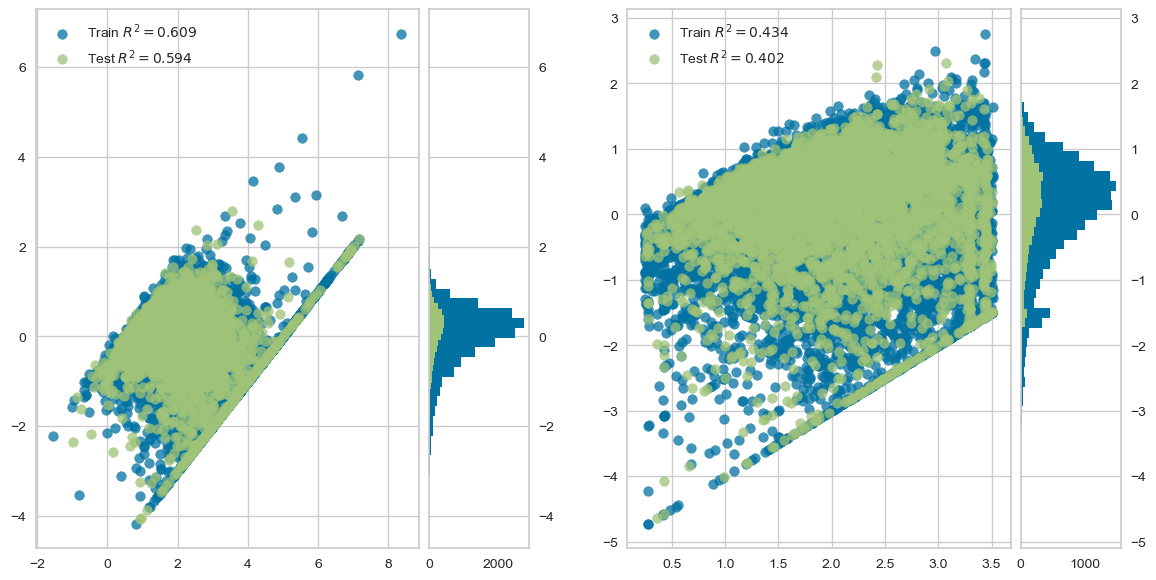

In [77]:
run_Outliers_Transformations_Linear_Regression(california_housing[selected_features], list(selected_features))